# Quick intro to `matplotlib`
### MCS 275 Spring 2023 - David Dumas

This is a quick tour of basic plotting with matplotlib.  For more detail see:
* [Chapter 4 of VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)
* [matplotlib documentation](https://matplotlib.org/3.7.1/index.html), which includes some handy single-page guides:
    * [matplotlib gallery](https://matplotlib.org/stable/gallery/index)
    * [matplotlib cheatsheet](https://matplotlib.org/cheatsheets/)
    * [matplotlib beginner handout](https://matplotlib.org/cheatsheets/handout-beginner.pdf)

You can install matplotlib on your own machine (e.g. `python3 -m pip install matplotlib`).  
Matplotlib is often most used in a notebook setting.

Matplotlib and numpy are pre-installed in the [Google Colab](https://colab.research.google.com/) notebook environment.

## Import matplotlib etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Optional: select a stylesheet

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Some stylesheets lack features (only support certain marker shapes, etc.).  Two good choices:
* Don't use a stylesheet at all
* Use `"seaborn-whitegrid"`

In [3]:
plt.style.use("seaborn-whitegrid")

## Absolutely minimal plot example

Plot $y = \sin(x)$ from $x=0$ to $x=2\pi$.

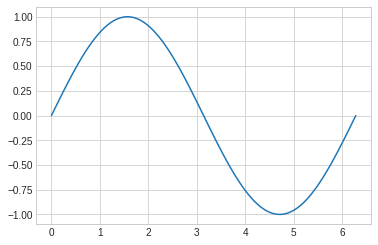

In [5]:
x = np.linspace(0,2*np.pi,100) # 100 evenly spaced values in interval 0 to 2pi
y = np.sin(x)

plt.plot(x,y)

We see the plot not because it's the return value of `plt.plot`, but because we're in a notebook environment.  Any cell that makes a matplotlib figure will display it below.

## A more complete line plot example

Set up a `plt.figure`, actually ask for it to be shown with `plt.show()`.

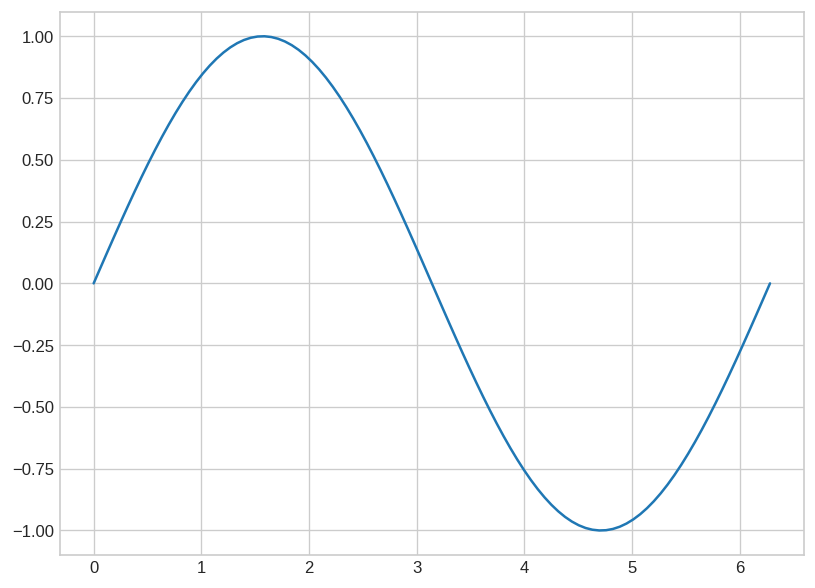

In [6]:
x = np.linspace(0,2*np.pi,100) # 100 evenly spaced values in interval 0 to 2pi
y = np.sin(x)

plt.figure(figsize=(8,6),dpi=120)  # Make figure; specify size (inches) and pixels per inch

plt.plot(x,y)

plt.show()  # Ask to see the figure (not strictly needed in notebook, required in a script)

## Line plot with markers

The plot above is actually just a series of line segments.  That becomes evident if we decrease the number of data points.

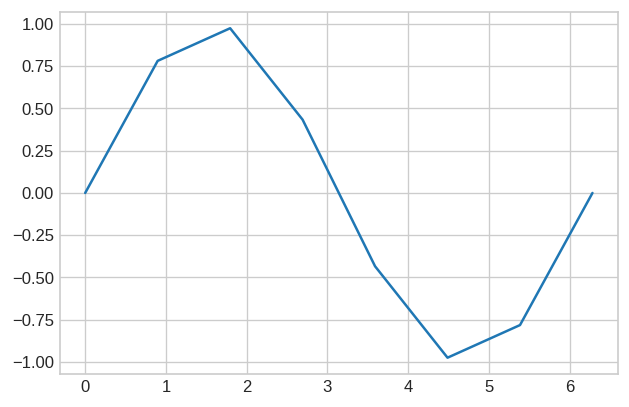

In [10]:
x = np.linspace(0,2*np.pi,8)
y = np.sin(x)

plt.figure(figsize=(6,4),dpi=120)

plt.plot(x,y)

plt.show()

In many cases it's a good idea to explicitly mark each data point, so sparseness of data and potential inaccuracy of the line segments becomes evident.

You can pass `marker="x"` to put a small `x` over each data point.  Or `marker="o"` to put a dot.  There are [lots of other markers](https://matplotlib.org/stable/api/markers_api.html).

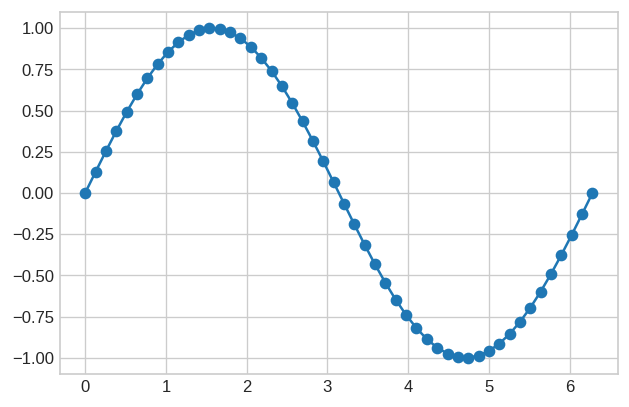

In [11]:
x = np.linspace(0,2*np.pi,50)
y = np.sin(x)

plt.figure(figsize=(6,4),dpi=120)

plt.plot(x,y,marker="o")  # try x, +, ., p, v

plt.show()

Passing `linestyle="none"` as another kwarg of `plt.plot`, we can omit the line entirely.

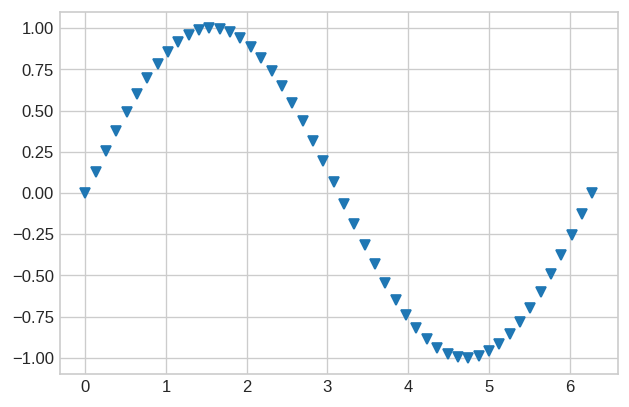

In [12]:
x = np.linspace(0,2*np.pi,50)
y = np.sin(x)

plt.figure(figsize=(6,4),dpi=120)

plt.plot(x,y,marker="v",linestyle="none")  # v gives triangles

plt.show()

## Multiple functions

Call `plt.plot` several times and each set of data will be shown on the same axes.  They don't need to use a common array of `x` coordinates.  You can mix different ranges and numbers of data points.

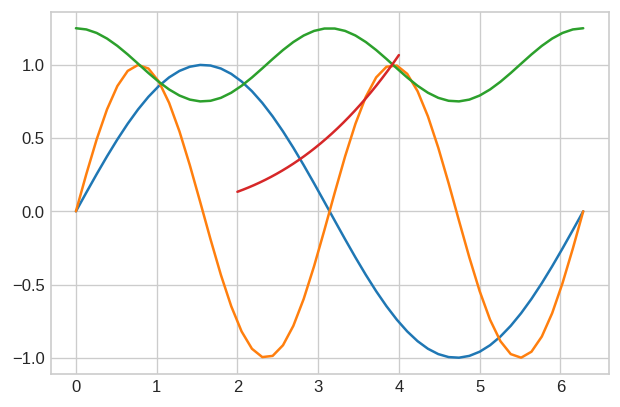

In [17]:
x = np.linspace(0,2*np.pi,50)  # 50 points from 0 to 2pi
x2 = np.linspace(2,4,30)       # 30 points from 2 to 4 

plt.figure(figsize=(6,4),dpi=120)

plt.plot(x, np.sin(x))            # y = sin(x) on [0,2pi]
plt.plot(x, np.sin(2*x))          # y = sin(2x) on [0,2pi]
plt.plot(x, 1 + 0.25*np.cos(2*x)) # y = 1+cos(2x)/4 on [0,2pi]
plt.plot(x2, x2**3 / 60)  # y = x^3 / 60 on [2,4]
plt.plot()

plt.show()

## Line colors and styles

`plt.plot` accepts `color`, `linestyle`, `linewidth` kwargs

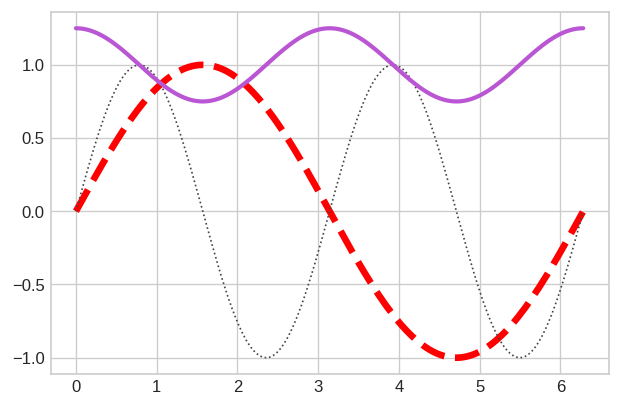

In [21]:
x = np.linspace(0,2*np.pi,150)

plt.figure(figsize=(6,4),dpi=120)

# very thick red dashes
plt.plot(x, np.sin(x), color="red", linestyle="dashed", linewidth=4)

# tiny thin dark gray dots
plt.plot(x, np.sin(2*x), color="#444444", linestyle="dotted", linewidth=1)

# purplish medium thickness solid line
plt.plot(x, 1 + 0.25*np.cos(2*x), color="mediumorchid", linestyle="solid", linewidth=2.5)

plt.show()

## Adjusting axes

`plt.xlim` and `plt.ylim`

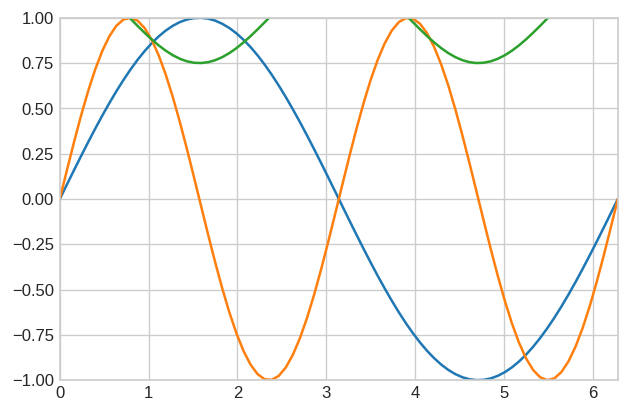

In [40]:
x = np.linspace(0,2*np.pi,80)

plt.figure(figsize=(6,4),dpi=120)

plt.plot(x, np.sin(x))
plt.plot(x, np.sin(2*x))
plt.plot(x, 1 + 0.25*np.cos(2*x))

# Only show x between 0 and 2 pi
plt.xlim(0,2*np.pi)

# Only show y between -1 and 1
plt.ylim(-1,1)

plt.show()

## Parametric plot

Just make `x` and `y` both arrays computed from a third one.  Or do those computations directly in the call to `plt.plot`.

Also, `plt.axis("equal")` makes unit size in vertical and horizontal directions the same.

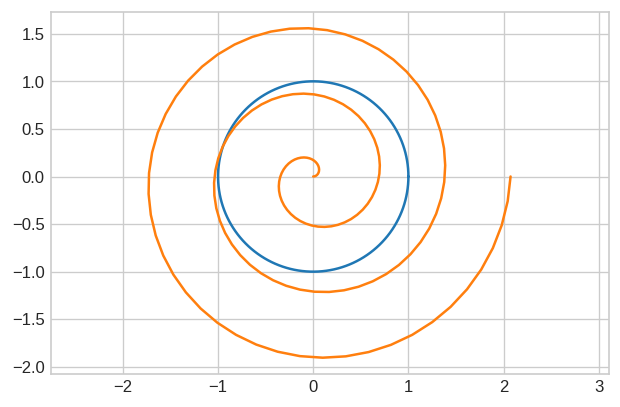

In [23]:
t = np.linspace(0,2*np.pi,150)

plt.figure(figsize=(6,4),dpi=120)

plt.plot(np.cos(t), np.sin(t)) # Note both x and y arguments are computed from t
plt.plot(0.33*t*np.cos(3*t), 0.33*t*np.sin(3*t))

plt.axis("equal")  # Make it so one unit in x or y direction has same length
                   # (required so unit circle looks circular, not like ellipse)
plt.show()

## Non-even spacing of `x` values

$y = \sin(1/x)$ has lots of fast motion near $x=0$, but slow change elsewhere.  A naive attempt to plot it gives poor results.

/tmp/ipykernel_1312550/187984193.py:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, np.sin(1/x))
/tmp/ipykernel_1312550/187984193.py:5: RuntimeWarning: invalid value encountered in sin
  plt.plot(x, np.sin(1/x))


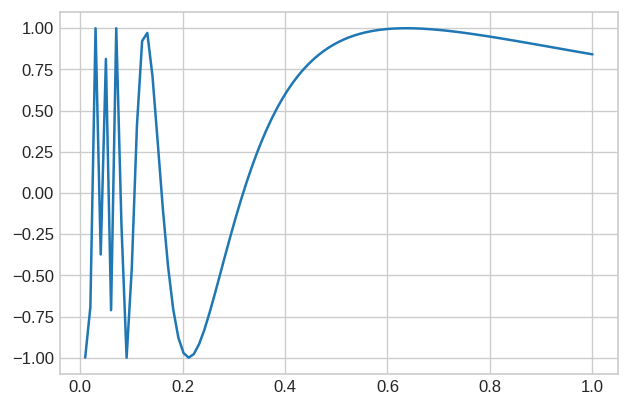

In [42]:
x = np.linspace(0,1,100)

plt.figure(figsize=(6,4),dpi=120)

plt.plot(x, np.sin(1/x))

plt.show()

We could just use many more sample points, though that's wasteful in the places where the function varies slowly.

/tmp/ipykernel_1312550/1812311069.py:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, np.sin(1/x))
/tmp/ipykernel_1312550/1812311069.py:5: RuntimeWarning: invalid value encountered in sin
  plt.plot(x, np.sin(1/x))


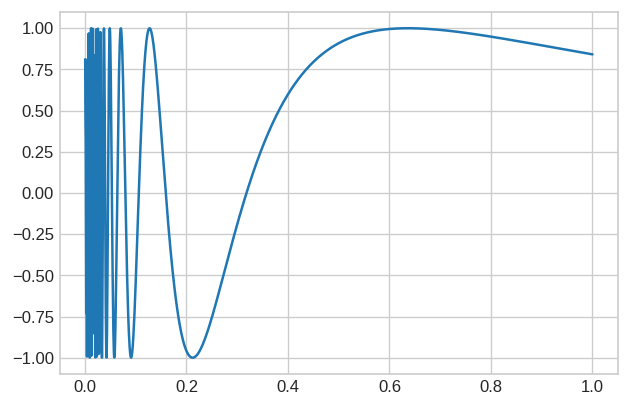

In [60]:
x = np.linspace(0,1,2000)

plt.figure(figsize=(6,4),dpi=120)

plt.plot(x, np.sin(1/x))

plt.show()

Another option is to use values of $x$ that are not evenly spaced: put them closer together near $x=0$ and more spaced out for larger $x$.

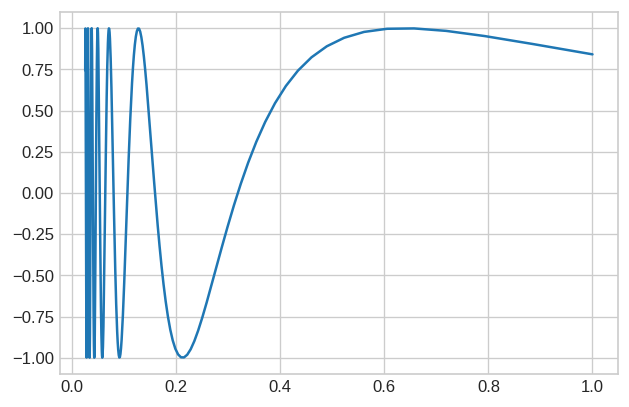

In [61]:
t = np.linspace(1,40,300)

x = 1/t

plt.figure(figsize=(6,4),dpi=120)

plt.plot(x, np.sin(1/x))

plt.show()

If we put markers on this last one, we'll see that most of the data points are at very small values of $x$.

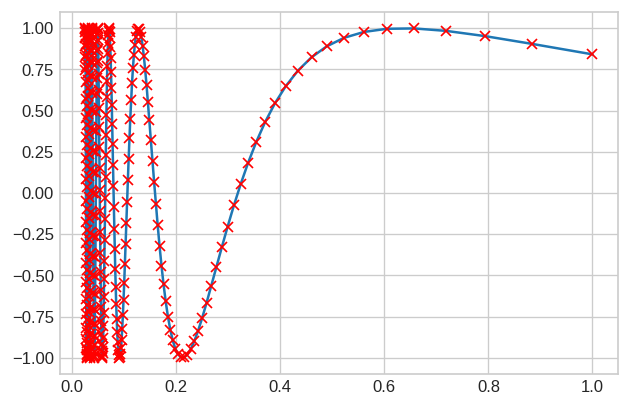

In [57]:
t = np.linspace(1,40,300)

x = 1/t

plt.figure(figsize=(6,4),dpi=120)

plt.plot(x, np.sin(1/x))
plt.plot(x, np.sin(1/x), marker="x",color="red",linestyle="none")

plt.show()

## Line plots can lie

If you plot $\tan(x)$, the poles are not recognized.  Instead, you get a continuous line plot.

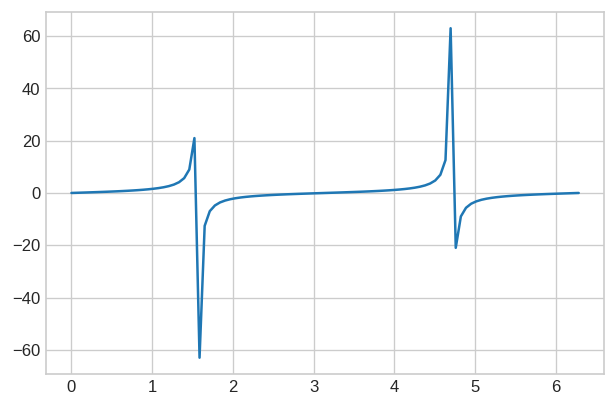

In [25]:
x = np.linspace(0,2*np.pi,100)

plt.figure(figsize=(6,4),dpi=120)

plt.plot(x, np.tan(x))

plt.show()

If you restrict the y range it looks a little better, but the vertical lines are still lies!  It's not a continuous curve.  But matplotlib knows nothing about the function you used---it only sees a list of values.

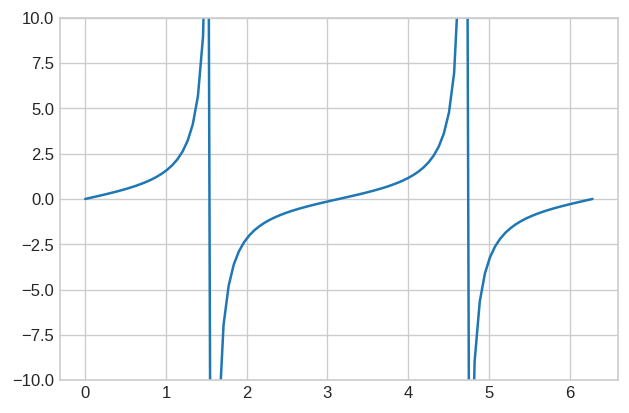

In [26]:
x = np.linspace(0,2*np.pi,100)

plt.figure(figsize=(6,4),dpi=120)

plt.plot(x, np.tan(x))
plt.ylim(-10,10)

plt.show()

One fix is to plot on each interval of continuity separately.  Another is to eliminate curves entirely and just draw the points, spacing them closely so it's easy to spot continuity/discontinuity.

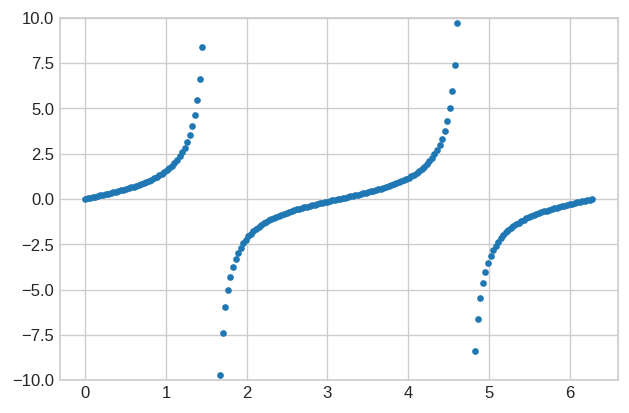

In [27]:
x = np.linspace(0,2*np.pi,200)

plt.figure(figsize=(6,4),dpi=120)

plt.plot(x, np.tan(x), linestyle="none", marker=".")
plt.ylim(-10,10)

plt.show()

## Plot labels and legends

Labels give names to axes and plots.

Plots can also have titles.

A legend shows the names of the plots in a figure.

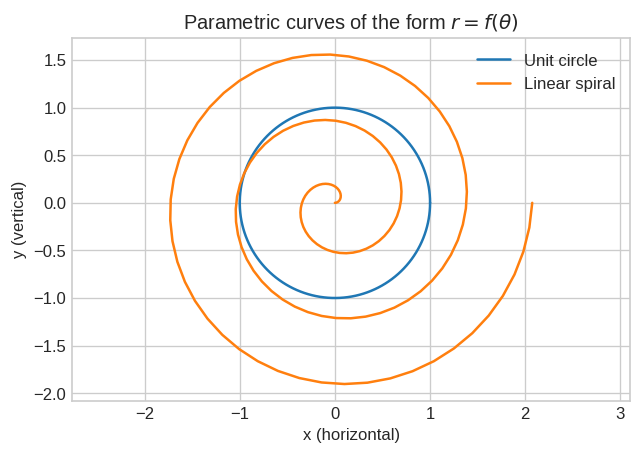

In [28]:
t = np.linspace(0,2*np.pi,150)

plt.figure(figsize=(6,4),dpi=120)

plt.plot(np.cos(t), np.sin(t), label="Unit circle")

plt.plot(0.33*t*np.cos(3*t), 0.33*t*np.sin(3*t), label="Linear spiral")

plt.title("Parametric curves of the form $r = f(\\theta)$")
plt.xlabel("x (horizontal)")
plt.ylabel("y (vertical)")

plt.axis("equal")  # Make it so one unit in x or y direction has same length

plt.legend()

plt.show()

## Saving plot as an image

`plt.savefig(filename)` does it.  Run it **before** `plot.show()`, or don't call `plt.show()` at all.

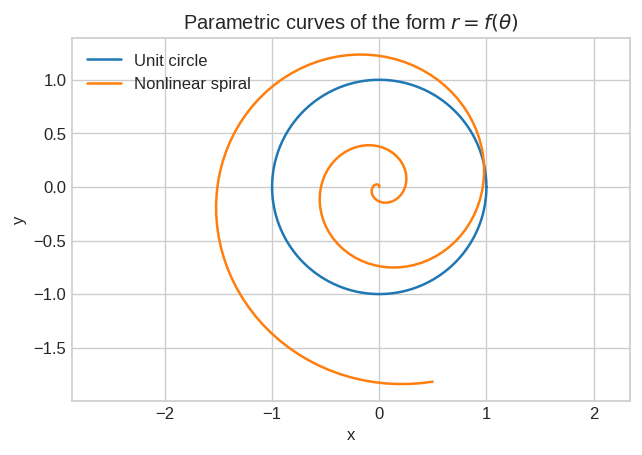

In [35]:
t = np.linspace(0,2*np.pi,150)

plt.figure(figsize=(6,4),dpi=120)

plt.plot(np.cos(t), np.sin(t), label="Unit circle")

plt.plot(0.3*t*np.cos(7*t**0.5), 0.3*t*np.sin(7*t**0.5), label="Nonlinear spiral")

plt.title("Parametric curves of the form $r = f(\\theta)$")
plt.xlabel("x")
plt.ylabel("y")

plt.axis("equal")  # Make it so one unit in x or y direction has same length

plt.legend()

plt.savefig("spiral.png")
plt.savefig("spiral.pdf")
plt.savefig("spiral.svg")

## Scatter plots

### Make with `plt.plot`: Same color and marker size for each point

In [36]:
# sample data: four characteristics of the same list of objects
n = np.array([1,1.5,2,2.5,3.5,5])
t = np.array([1.8,2.6,3.5,4.9,8.8,8.2])
s = np.array([0.1,0.1,0.1,0.2,0.2,0.5])
c = np.array([1,2,3,5,8,20])

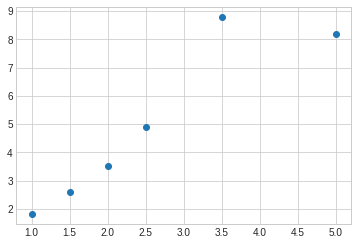

In [39]:
# Use `n` as x axis and `t` as y axis.  Draw dots.
plt.plot(n,t,linestyle="",marker="o")

### Make with `plt.scatter`: Can specify size and color for each point

kwarg `cmap` selects colormap.  `plt.colorbar()` adds a color bar.  `plt.colormaps()` shows available ones.

## Scatter plot real world data

CSV with data about meteorites recovered on earth's surface, adapted from a NASA dataset:
* [meteorites.csv](https://www.dumas.io/teaching/2022/spring/mcs275/data/meteorites.csv)

Let's load it into a dictionary mapping column names to lists of values (thanks, `defaultdict`!) and then make some plots.

For this dataset it turns out sizing by $0.002 m^{2/3}$ is a good choice.

kwarg `alpha` can make the markers partially transparent.

Pretty nice.  Looks like a world map.  Questions:
* How much influence does population density have on this?
* What's the likely distribution of actual meteorite landing points?
* What's that really big one from before 1827 near latitude 75?

### Annotate

Let's take that plot and add text labeling a certain point.  Specifically, the really big meteorite from before 1827.

In [ ]:
plt.annotate("Cape York Meteorite (1818)",
             xy=(-64.933,76.13),   # Point we're annotating
             xycoords='data',      # inform matlab these coords are in data units
             xytext=(0, 15),  # Where the text goes
             textcoords='offset points',  # inform matlab of units and origin for the coords on prev line
                                          # (units = points, origin = the point being annotated)
             horizontalalignment='center',
             verticalalignment='bottom',
            )


### That really big meteorite from 1818

https://en.wikipedia.org/wiki/Cape_York_meteorite#/media/File:Ahnighito_AMNH,_34_tons_meteorite.jpg

## Contour and density plots

Let's try $f(x,y) = x^3 - 8x + 3y^2 + \frac{1}{2}y^3$.

* `plt.contour(xx,yy,zz,[contourlist])` - contour plot
* `plt.contourf(xx,yy,zz,[contourlist])` - filled contour plot


In [11]:
x = np.linspace(-3,3,100)
y = np.linspace(-2,2,80)
xx,yy = np.meshgrid(x,y)

### Adding labels to contours

`plt.clabel` adds labels to an existing contour plot.  Its argument is the return value of a previous call to `plt.contour`.

### Density plots with `plt.imshow`

In [ ]:
plt.imshow(zz,extent=[np.min(x),np.max(x),np.min(y),np.max(y)],origin="lower")
# origin="lower" means the first row of zz appears at the bottom of the plot.
# That's correct since our meshgrid has smallest y values in the first row.

### Combining density and contour plots